In [15]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [16]:
from helpers import load_data

# load dataset
x, y = load_data()

In [21]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

[[27 35 40 38  2  3 48 29 46 31 32 39]
 [21 36 19 42 49 26 22 13 41 17 45 24]
 [23  4 33 14 30 10 28 44 34 18 20 25]
 [ 6  7 47  1 16  0 15  5 11  9  8 12]]


In [59]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # get k'th subgroup in test, others in train
    # ***************************************************
    test_y = y[k_indices[k]]
    test_x = x[k_indices[k]]
    train_y = (y[k_indices[np.arange(len(k_indices))!=k]]).flatten()
    train_x = (x[k_indices[np.arange(len(k_indices))!=k]]).flatten()
    # ***************************************************
    # form data with polynomial degree
    # ***************************************************
    polytrain = build_poly(train_x, degree)
    polytest = build_poly(test_x, degree)
    # ***************************************************
    # ridge regression
    # ***************************************************
    ridge = ridge_regression(train_y, polytrain, lambda_)
    # ***************************************************
    # calculate the loss for train and test data
    # ***************************************************
    loss_tr = np.sqrt(compute_mse(train_y, polytrain, ridge))
    loss_te = np.sqrt(compute_mse(test_y, polytest, ridge))
    return loss_tr, loss_te

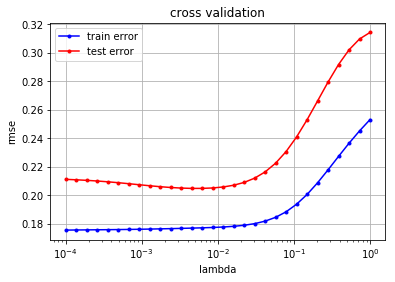

In [92]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # cross validation
    # ***************************************************    
    for lamdba_ in lambdas:
        for k in range(k_fold):
            rmse_trt, rmse_tet = cross_validation(y, x, k_indices, k, lamdba_, degree)
            rmse_tr.append(rmse_trt)
            rmse_te.append(rmse_tet)
    rmse_tr = np.reshape(rmse_tr, (len(lambdas), k_fold))
    rmse_te = np.reshape(rmse_te, (len(lambdas), k_fold))
    cross_validation_visualization(lambdas, rmse_tr.mean(axis=1), rmse_te.mean(axis=1))

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [96]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        (xtrain, ytrain), (xtest, ytest) = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # bias_variance_decomposition:
        # ***************************************************
        for degree in degrees:
            polytrain = build_poly(xtrain, degree)
            polytest = build_poly(xtest, degree)
            ridge = ridge_regression(ytrain, polytrain, lambda_)
            loss_tr = np.sqrt(compute_mse(ytrain, polytrain, ridge))
            loss_te = np.sqrt(compute_mse(ytest, polytest, ridge))
            rmse_tr.append(loss_tr)
            rmse_te.append(loss_te)

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

NameError: name 'lambda_' is not defined